In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statistics import mean
from rlhfutils.rl_utils import get_synth_rewards
from tqdm import tqdm
from datasets import Dataset, concatenate_datasets

/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-03-09 15:32:08,807] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/u/prasanns/miniconda3/envs/rlhfenv/lib/python3.10/site-packages/trl/trainer/ppo_config.py:142: UserWarning: The `optimize_cuda_cache` argument will be deprecated soon, please use `optimize_device_cache` instead.
  warnings.warn(


In [2]:
%load_ext autoreload
%autoreload 2

In [129]:
ds = Dataset.load_from_disk("../../../active-rlhf/outputs/data/contrastivedistill/wikionpolicyprompts//")

In [132]:
len(concatenate_datasets([ds]*10))

847570

In [3]:
# tlog = pd.read_json("../../outputs/bagofwords/dynarmlogs/expbow50_updatereprod_fix.jsonl", orient='records', lines=True)
# tlog = pd.read_json("../../../active-rlhf/outputs/results/dynarmlogs/bagofwords/expbow50_reprodtest_exact.jsonl", orient='records', lines=True)
tlog = pd.read_json("../../../active-rlhf/outputs/results/dynarmlogs/contrastivedistill/tiny_rm_conf_subsamp_bigrollout.jsonl", orient='records', lines=True)

In [4]:
tlog['texts'][0]

["Question: In the following months, several other apparitions were\n\nAnswer:  thought to coast on madness, and let's not pretend to believe that any of them was real.\nLike facing money.\nExcept Bitcoin.\ncrappy? Read it",
 'Question: In the following months, several other apparitions were\n\nAnswer:  assumed...\nHappy!                      I could go so long without seeing him.']

In [53]:
# tlog = pd.read_json("../../../active-rlhf/outputs/results/rollouts/nouns/ppo_goldb8.jsonl", orient='records', lines=True)
# print(len(tlog))

In [54]:
tmp = tlog
tmp = tmp.dropna(subset='golds')

In [55]:
tmp

,texts,rewards,golds,labelled,step,reuses
0,"[Question: In the following months, several ot...","[-0.1533203125, -0.0615234375]","[-0.15625, 0.015625]",0.0,1,NaN
1,[Question: Camels have long been domesticated ...,"[0.07666015625, 0.023681640625]","[-0.125, -0.3125]",0.0,1,NaN
2,[Question: The source of the fallacy lies not ...,"[-0.1943359375, -0.1787109375]","[-0.203125, -0.109375]",0.0,1,NaN
3,[Question: 1600 to 1046 BC based on the\n\nAns...,"[-0.00634765625, 0.0230712890625]","[-0.3125, -0.25]",0.0,1,NaN
4,[Question: An object is a philosophical term o...,"[0.234375, -0.185546875]","[-0.046875, -0.28125]",0.0,1,NaN
...,...,...,...,...,...,...
1340,[Question: The denomination 720 for this year ...,"[-2.21875, -0.10205078125]","[-0.46875000000000006, -0.1328125]",80.0,20,NaN
1341,[Question: January 3 \n War of the Sixth Coali...,"[-1.578125, -1.609375]","[-0.125, -0.25]",80.0,20,NaN
1342,[Question: It documents the story of human cul...,"[-0.078125, -0.10302734375]","[0.0, -0.109375]",80.0,20,NaN
1343,"[Question: In the 1990s, foreign relations, es...","[-0.130859375, -0.8437500000000001]","[-0.140625, -0.375]",80.0,20,NaN


In [56]:
rat = 0
ngs = []
sind = 0
for ind, row in tmp.iloc[sind:].iterrows():
    # row['golds'] = get_synth_rewards(row['texts'], 'bagofwords')
    ngs.append(row['golds'])
    if ((row['rewards'][0]>row['rewards'][1])!=(row['golds'][0]>row['golds'][1])):
        rat+=1
tmp['golds'] = ngs
print(rat/len(tmp))

0.39609375


/tmp/ipykernel_3407016/2034297275.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['golds'] = ngs


In [57]:
tmp['texts'][2]

["Question: The source of the fallacy lies not in an invalid\n\nAnswer:  point of view - friends and co-workers should be able to be reasoned with.\nI think you're onrushing the question.    Regarding your main complaint:  Try tapping down the biggest and most important channels on your",
 "Question: The source of the fallacy lies not in an invalid\n\nAnswer:  analysis of the tables.\nThank you for attacking the straws ;)\nThat's not what I'm pointing to.  Kettering just doesn't give the table any credibility. ;)"]

In [58]:
tmp

,texts,rewards,golds,labelled,step,reuses
0,"[Question: In the following months, several ot...","[-0.1533203125, -0.0615234375]","[-0.15625, 0.015625]",0.0,1,NaN
1,[Question: Camels have long been domesticated ...,"[0.07666015625, 0.023681640625]","[-0.125, -0.3125]",0.0,1,NaN
2,[Question: The source of the fallacy lies not ...,"[-0.1943359375, -0.1787109375]","[-0.203125, -0.109375]",0.0,1,NaN
3,[Question: 1600 to 1046 BC based on the\n\nAns...,"[-0.00634765625, 0.0230712890625]","[-0.3125, -0.25]",0.0,1,NaN
4,[Question: An object is a philosophical term o...,"[0.234375, -0.185546875]","[-0.046875, -0.28125]",0.0,1,NaN
...,...,...,...,...,...,...
1340,[Question: The denomination 720 for this year ...,"[-2.21875, -0.10205078125]","[-0.46875000000000006, -0.1328125]",80.0,20,NaN
1341,[Question: January 3 \n War of the Sixth Coali...,"[-1.578125, -1.609375]","[-0.125, -0.25]",80.0,20,NaN
1342,[Question: It documents the story of human cul...,"[-0.078125, -0.10302734375]","[0.0, -0.109375]",80.0,20,NaN
1343,"[Question: In the 1990s, foreign relations, es...","[-0.130859375, -0.8437500000000001]","[-0.140625, -0.375]",80.0,20,NaN


In [59]:
tot, corr = 0, 0
vals = []
for j in range(0, len(tmp), 50):
    # check heuristic accuracy
    for i, row in tmp.iloc[j:j+50].iterrows():
        # if abs(row['rewards'][0]-row['rewards'][1])>row['thresh']:
        if row['golds'][0]==row['golds'][1]:
            continue
        tot = tot+1
        corr += 1 if ((row['rewards'][0]>row['rewards'][1])==(row['golds'][0]>row['golds'][1])) else 0
    vals.append(corr/tot)

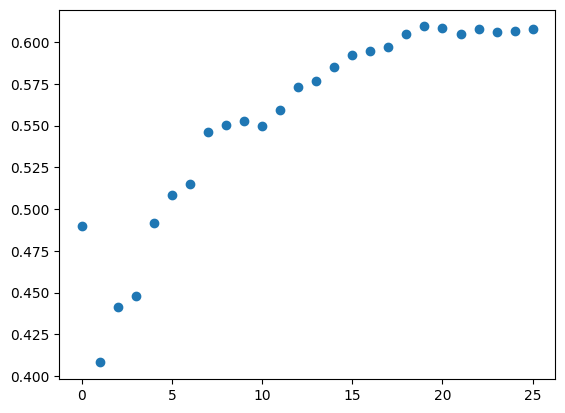

In [60]:
plt.scatter(range(len(vals)), vals)

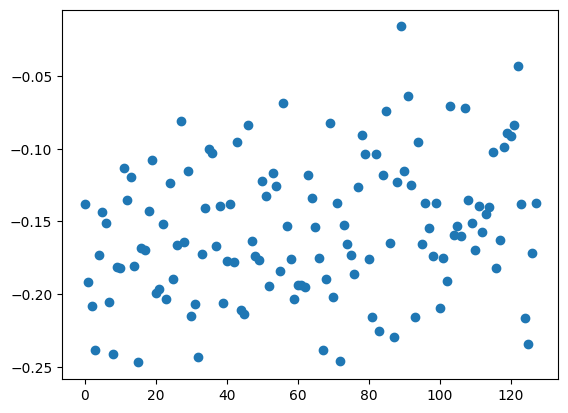

In [61]:
means = [mean(m) for m in tmp['golds']]
interv =10
mbins = [mean(means[i:i+interv]) for i in range(0, len(means), interv)]
plt.scatter(range(len(mbins)), mbins)

In [62]:
mean(means[-200:])

-0.1393359375

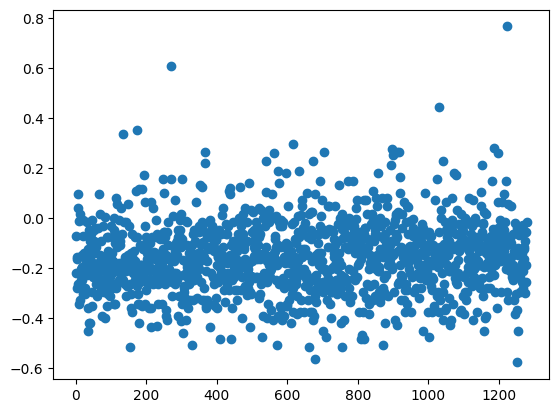

In [17]:
means = [mean(m) for m in tmp['golds']]
plt.scatter(range(len(means)), means)